## Upload dataset

In [ ]:
# Run code on Colab
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving Dataset2.csv to Dataset2.csv


In [ ]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['Dataset2.csv']))

#Ensure correct dataset is being inputted
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns



---

# Descriptive analysis of dataset

In [ ]:
# Getting the shape of the dataframe
print(df.shape)

(23535, 10)


In [ ]:
# List the columns of the dataframe
print(df.columns)

Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


In [ ]:
# Check for missing values in the dataset
print(df.isna().sum())

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


In [ ]:
# Display the data types of each column
df.dtypes

Age                      int64
Gender                  object
Calorie_Intake           int64
Sugar_Intake             int64
Physical_Activity        int64
Fast_Food_Frequency      int64
Screen_Time              int64
Height                 float64
Weight                 float64
BMI                    float64
dtype: object

In [ ]:
# Display overall summary statistics
print(df.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In [ ]:
# Subset the data where 'Female' is True
female_df = df[df['Gender'] == 'Female']

# Display summary statistics for females
print(female_df.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  14896.000000    14896.000000  14896.000000       14896.000000   
mean      48.618421     2493.118153     64.879431          89.353719   
std       17.917357      579.022068     32.097486          52.259134   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1986.750000     37.000000          44.000000   
50%       48.000000     2489.000000     65.000000          89.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         14896.000000  14896.000000  14896.000000  14896.000000   
mean              2.031686      5.458647      1.650469     70.047838   
std               1.415140      3.469529      0.119716     15.154101   
min               0.000000      0.000000      1.196086     10.0

In [ ]:
# Subset the data where 'Male' is True
male_df = df[df['Gender'] == 'Male']

# Display summary statistics for males
print(male_df.describe())

               Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  8639.000000     8639.000000   8639.000000        8639.000000   
mean     48.385693     2500.548559     64.729946          89.743257   
std      17.795606      575.686427     31.845590          51.883528   
min      18.000000     1500.000000     10.000000           0.000000   
25%      33.000000     2003.000000     37.000000          45.000000   
50%      48.000000     2506.000000     65.000000          91.000000   
75%      64.000000     2992.000000     92.000000         135.000000   
max      79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency  Screen_Time       Height       Weight          BMI  
count          8639.000000  8639.000000  8639.000000  8639.000000  8639.000000  
mean              1.995601     5.533511     1.649950    69.969663    26.113739  
std               1.413552     3.426840     0.119718    14.777985     6.776816  
min               0.000000     0.000



---
# Data pre-processing



### 1) Labelling and categorization of variables

In [ ]:
# Label gender column to numeric categorical
df['Gender_cat'] = df['Gender']
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0

df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Gender_cat
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,Female
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,Female
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,Male
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,Female
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,Female


In [ ]:
# Create a binary column for underweight
df['Underweight'] = df['BMI'] < 18.5

# Create a binary column for healthy
df['Healthy'] = (df['BMI'] >= 18.5) & (df['BMI'] < 25)

# Create a binary column for overweight
df['Overweight'] = (df['BMI'] >= 25) & (df['BMI'] < 30)

# Create a binary column for obese
df['Obese'] = df['BMI'] > 30

# Create a binary column for overweight and obese
df['Overweight and Obese'] = df['BMI'] >= 25

# Create a categorical column for BMI
## Create function to categorize BMI and apply function to create new column
def BMI_cat_fun(bmi):
  if bmi < 18.5:
      return "Underweight"
  elif 18.5 <= bmi < 25:
      return "Healthy"
  elif 25 <= bmi < 30:
      return "Overweight"
  else:
      return "Obese"
df['BMI_cat'] = df['BMI'].apply(BMI_cat_fun)

df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Gender_cat,Underweight,Healthy,Overweight,Obese,Overweight and Obese,BMI_cat
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,Female,False,False,False,True,True,Obese
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,Female,False,False,True,False,True,Overweight
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,Male,False,False,True,False,True,Overweight
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,Female,False,False,False,True,True,Obese
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,Female,False,False,True,False,True,Overweight


### 2) Initial visualization ###

In [ ]:
#Count number of individuals per BMI category
underweight_count = df['BMI_cat'].value_counts()['Underweight']
healthy_count = df['BMI_cat'].value_counts()['Healthy']
overweight_count = df['BMI_cat'].value_counts()['Overweight']
obese_count = df['BMI_cat'].value_counts()['Obese']

print (underweight_count)
print (healthy_count)
print (overweight_count)
print (obese_count)

2913
7922
6444
6256


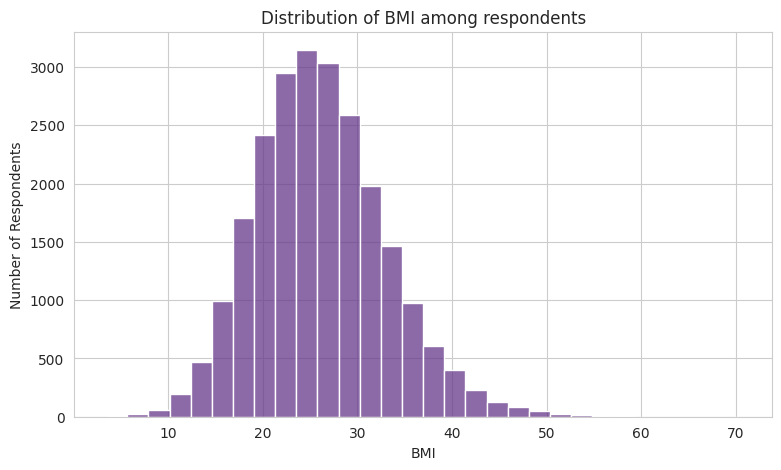

In [ ]:
# Create histogram of BMI to examine the distribution
sns.set_style('whitegrid')

plt.figure(figsize=(9, 5))
sns.histplot(df['BMI'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of BMI among respondents')
plt.xlabel('BMI')
plt.ylabel('Number of Respondents')
plt.show() # normal distribution of BMI

In [ ]:
# Create an interactive histogram for the 'Age' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Age',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of age by BMI categories',
                   color= "Gender_cat"
                   )

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Gender' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Gender_cat',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of gender by BMI categories',
                   labels = {'Gender_cat': 'Gender'} )

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Calorie Intake' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Calorie_Intake',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of calorie intake by BMI categories',
                   color= "Gender_cat",
                   labels = {'Calorie_Intake': 'Calorie Intake'} )

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Sugar Intake' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Sugar_Intake',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of sugar intake by BMI categories',
                   color= "Gender_cat",
                   labels = {'Sugar_Intake': 'Sugar Intake'} )

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Physical Activity' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Physical_Activity',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of physical activity by BMI categories',
                   color= "Gender_cat",
                   labels = {'Physical_Activity': 'Physical Activity'}
                   )

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Fast Food Frequency' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Fast_Food_Frequency',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of fast food frequency by BMI categories',
                   color= "Gender_cat",
                   labels = {'Fast_Food_Frequency': 'Fast Food Frequency'}
                   )

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Screen Time' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Screen_Time',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of screen time by BMI categories',
                   color= "Gender_cat",
                   labels = {'Fast_Food_Frequency': 'Fast Food Frequency'})

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Height' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Height',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of height by BMI categories',
                   color= "Gender_cat",
                   labels = {'Fast_Food_Frequency': 'Fast Food Frequency'})

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook

In [ ]:
# Create an interactive histogram for the 'Screen Time' feature by BMI categories
pio.renderers.default='notebook'

fig = px.histogram(df,
                   x='Weight',
                   facet_col = 'BMI_cat',
                   facet_col_wrap = 2,
                   nbins=30,
                   title='Distribution of weight by BMI categories',
                   color= "Gender_cat",
                   labels = {'Fast_Food_Frequency': 'Fast Food Frequency'})

## Customizing the layout and theme
fig.update_layout(template="simple_white")
fig.show(renderer= "colab") # plots visible on colab notebook



---


## Apply KNN

### 1) All BMI categories

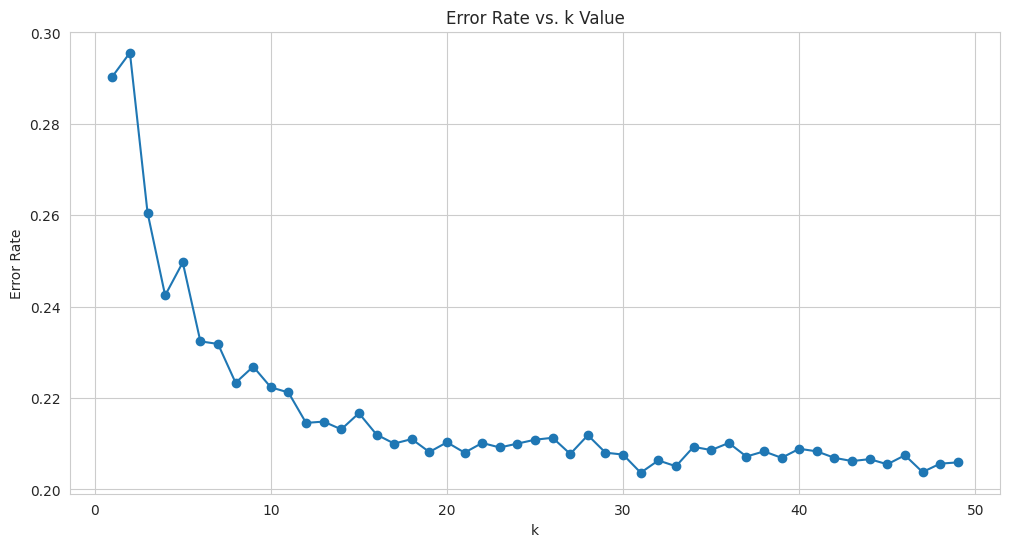

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['BMI_cat']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose range of k values to test from 1 to 49
k_values = range(1,50)

# Empty list to keep track of error rates for each k value
errors = []
# Loop over k_values to train and test the KNN classifier
for k in k_values:
  # Initialize KNN classifier with current k value
  knn = KNeighborsClassifier(n_neighbors=k)
  # Train classifier on training data
  knn.fit(X_train, y_train)
  # Predict the labels for the test se
  y_pred = knn.predict(X_test)
  #Calculate error rate: 1 - accuracy
  error = 1 - accuracy_score(y_test, y_pred)
  errors.append(error)

plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [ ]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=16, metric = 'euclidean') #K=16 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2201    0  199    5]
 [   2 1550  286    0]
 [ 365  158 1426    0]
 [ 482    0    0  387]]
              precision    recall  f1-score   support

     Healthy       0.72      0.92      0.81      2405
       Obese       0.91      0.84      0.87      1838
  Overweight       0.75      0.73      0.74      1949
 Underweight       0.99      0.45      0.61       869

    accuracy                           0.79      7061
   macro avg       0.84      0.73      0.76      7061
weighted avg       0.81      0.79      0.78      7061



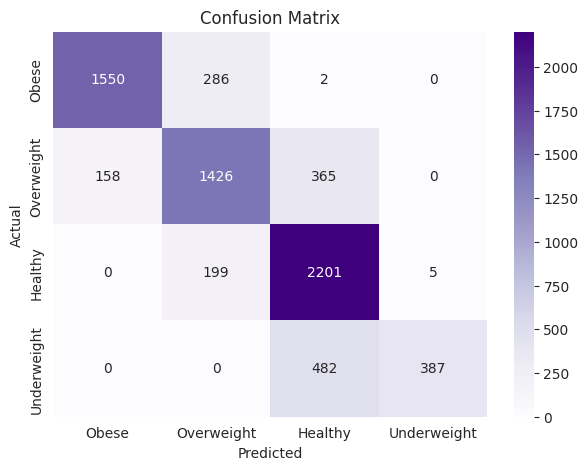

In [ ]:
# Get unique classes
classes = df['BMI_cat'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2) BMI category: Overweight and obese

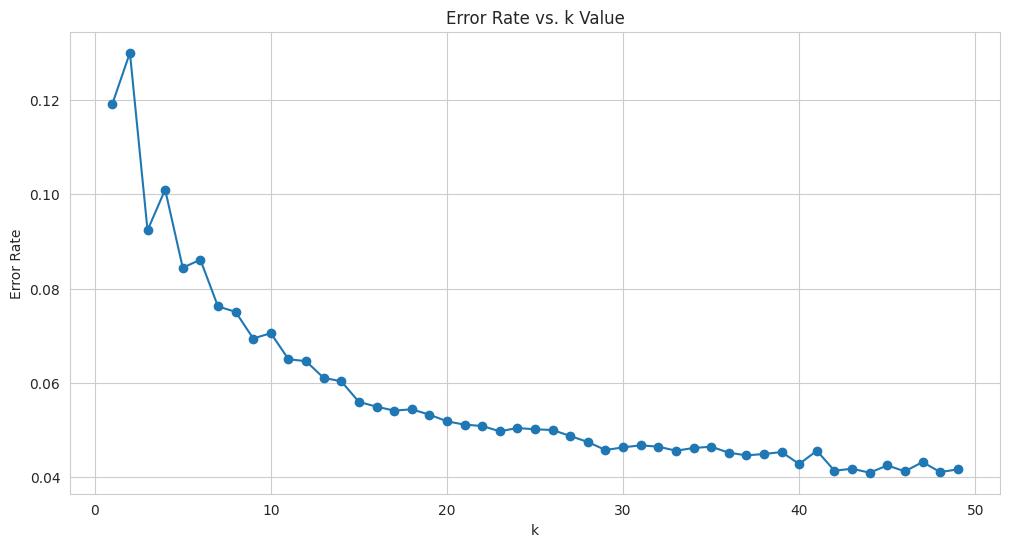

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose range of k values to test from 1 to 49
k_values = range(1,50)

# Empty list to keep track of error rates for each k value
errors = []
# Loop over k_values to train and test the KNN classifier
for k in k_values:
  # Initialize KNN classifier with current k value
  knn = KNeighborsClassifier(n_neighbors=k)
  # Train classifier on training data
  knn.fit(X_train, y_train)
  # Predict the labels for the test se
  y_pred = knn.predict(X_test)
  #Calculate error rate: 1 - accuracy
  error = 1 - accuracy_score(y_test, y_pred)
  errors.append(error)

plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [ ]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15, metric = 'euclidean') #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2992  240]
 [ 155 3674]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3232
        True       0.94      0.96      0.95      3829

    accuracy                           0.94      7061
   macro avg       0.94      0.94      0.94      7061
weighted avg       0.94      0.94      0.94      7061



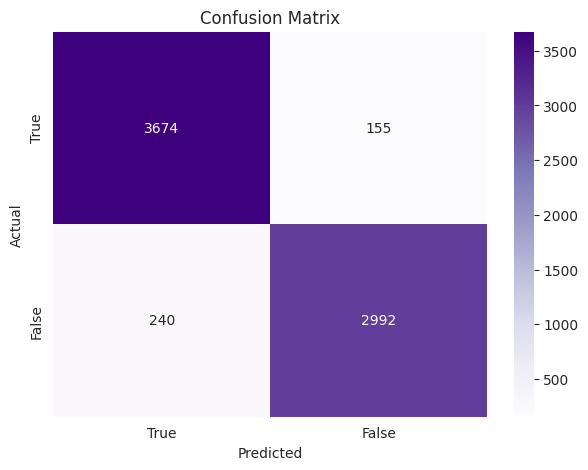

In [ ]:
# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



---
## Accuracy of modifiable risk factors in model


### 1) Drop calorie intake only

[[3021  211]
 [ 153 3676]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3232
        True       0.95      0.96      0.95      3829

    accuracy                           0.95      7061
   macro avg       0.95      0.95      0.95      7061
weighted avg       0.95      0.95      0.95      7061



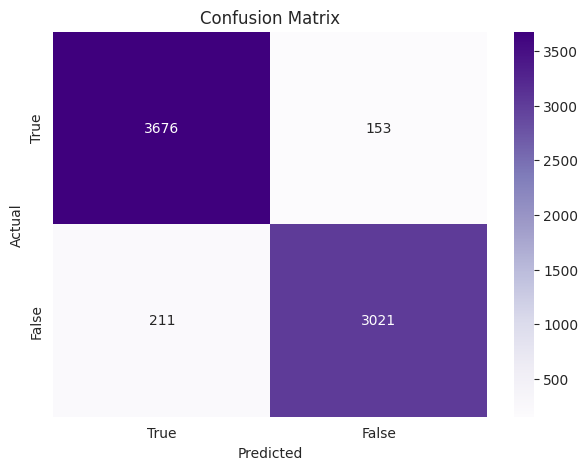

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2) Drop sugar intake only

[[3018  214]
 [ 149 3680]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3232
        True       0.95      0.96      0.95      3829

    accuracy                           0.95      7061
   macro avg       0.95      0.95      0.95      7061
weighted avg       0.95      0.95      0.95      7061



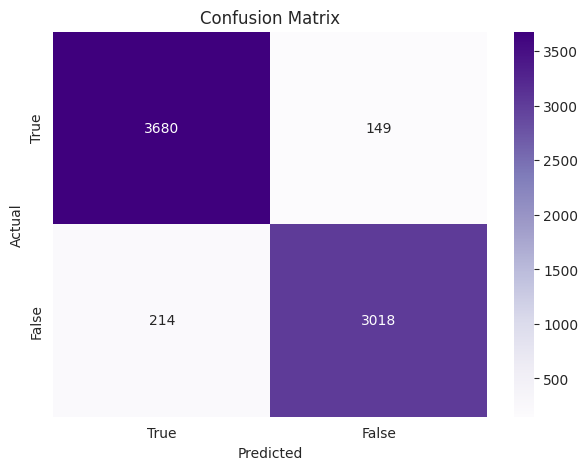

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3) Drop physical activity only

[[3037  195]
 [ 154 3675]]
              precision    recall  f1-score   support

       False       0.95      0.94      0.95      3232
        True       0.95      0.96      0.95      3829

    accuracy                           0.95      7061
   macro avg       0.95      0.95      0.95      7061
weighted avg       0.95      0.95      0.95      7061



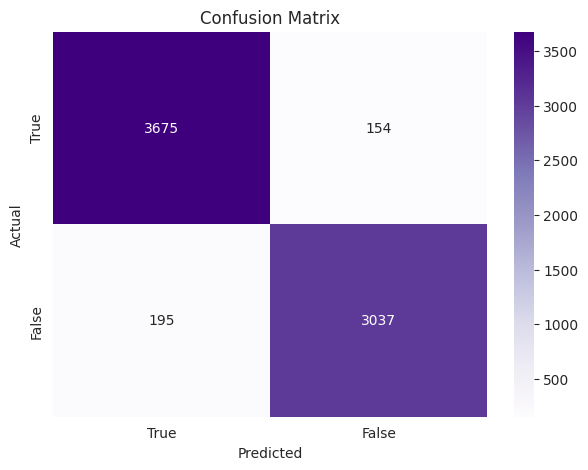

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4) Drop fast food frequency only

[[3005  227]
 [ 148 3681]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3232
        True       0.94      0.96      0.95      3829

    accuracy                           0.95      7061
   macro avg       0.95      0.95      0.95      7061
weighted avg       0.95      0.95      0.95      7061



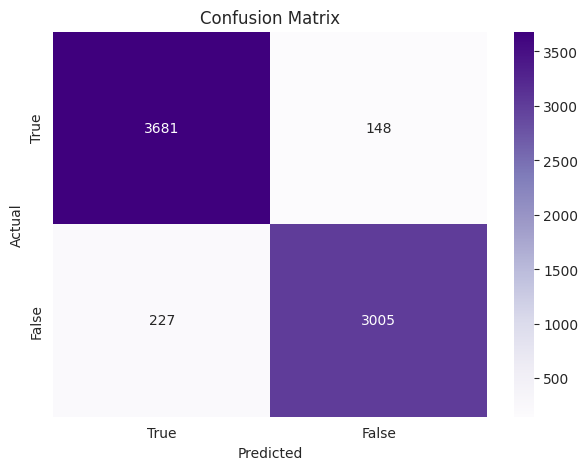

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Screen_Time', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 5) Drop screen time only

[[3017  215]
 [ 161 3668]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3232
        True       0.94      0.96      0.95      3829

    accuracy                           0.95      7061
   macro avg       0.95      0.95      0.95      7061
weighted avg       0.95      0.95      0.95      7061



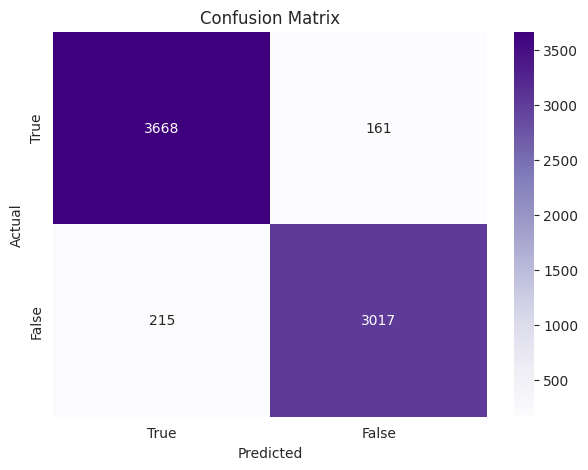

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Accuracy of unmodifiable risk factors in model

### 1) Drop age only

[[3014  218]
 [ 170 3659]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3232
        True       0.94      0.96      0.95      3829

    accuracy                           0.95      7061
   macro avg       0.95      0.94      0.94      7061
weighted avg       0.95      0.95      0.95      7061



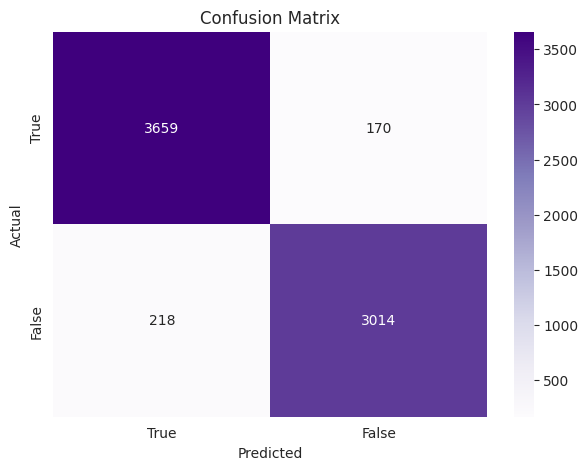

In [ ]:
# Split data into features and label
X = df[['Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 2) Drop gender only

[[3021  211]
 [ 167 3662]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3232
        True       0.95      0.96      0.95      3829

    accuracy                           0.95      7061
   macro avg       0.95      0.95      0.95      7061
weighted avg       0.95      0.95      0.95      7061



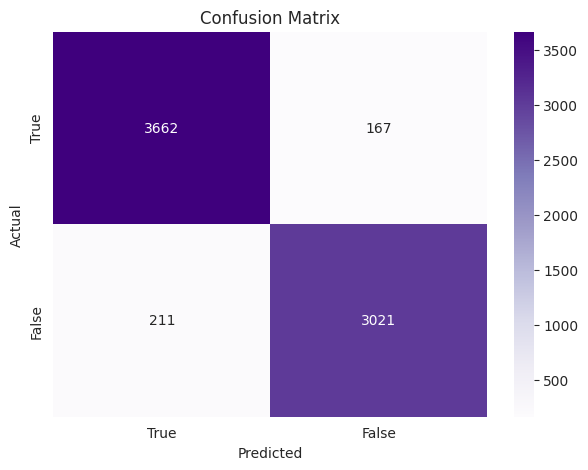

In [ ]:
# Split data into features and label
X = df[['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3) Drop height only

[[2461  771]
 [ 651 3178]]
              precision    recall  f1-score   support

       False       0.79      0.76      0.78      3232
        True       0.80      0.83      0.82      3829

    accuracy                           0.80      7061
   macro avg       0.80      0.80      0.80      7061
weighted avg       0.80      0.80      0.80      7061



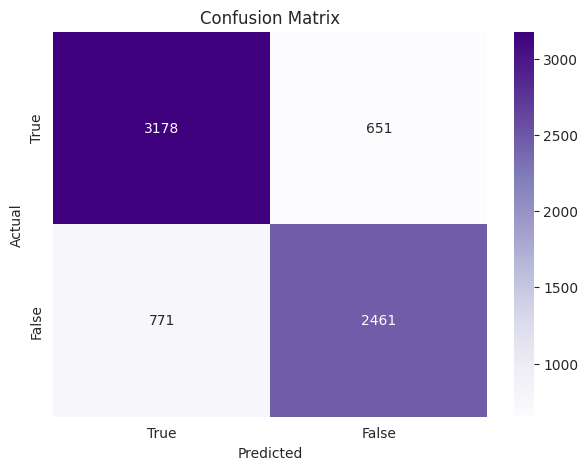

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Weight']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4) Drop weight only

[[1929 1303]
 [1102 2727]]
              precision    recall  f1-score   support

       False       0.64      0.60      0.62      3232
        True       0.68      0.71      0.69      3829

    accuracy                           0.66      7061
   macro avg       0.66      0.65      0.65      7061
weighted avg       0.66      0.66      0.66      7061



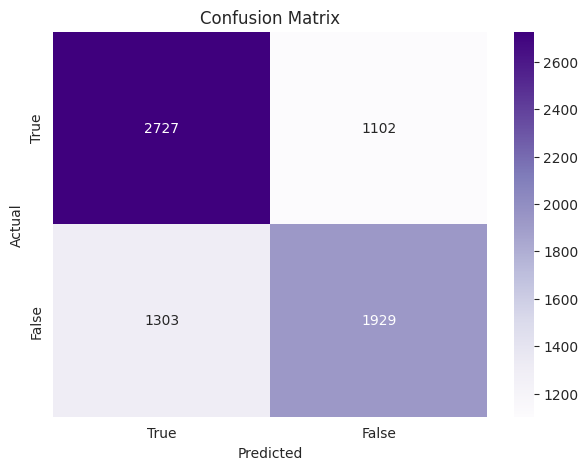

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 5) Drop height and weight only

[[1231 2001]
 [1467 2362]]
              precision    recall  f1-score   support

       False       0.46      0.38      0.42      3232
        True       0.54      0.62      0.58      3829

    accuracy                           0.51      7061
   macro avg       0.50      0.50      0.50      7061
weighted avg       0.50      0.51      0.50      7061



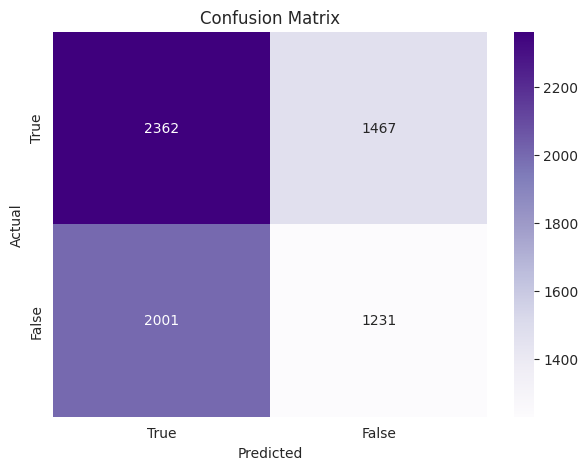

In [ ]:
# Split data into features and label
X = df[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time']]
y = df['Overweight and Obese']

# Split data into training and testing sets where training data is 70% of original data and test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=15)  #K=15 based on error rate vs k value
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get unique classes
classes = df['Overweight and Obese'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()